In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
feat = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
        'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
df = df[feat]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               38843 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 3.0 MB


### Question 1
Find a feature with missing values. How many missing values does it have?

In [3]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Question 2
What's the median (50% percentile) for variable 'minimum_nights'?

In [4]:
df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

### Split the data
* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the np.log1p() function.

In [5]:
np.random.seed(42)
# get the number of lines
n_rows = df.shape[0]
# get the numbers of rows for train/val/test
n_train = n_rows - int(n_rows * .2) * 2
n_val = int(n_rows * .2)
n_test = int(n_rows * .2)

print(n_rows, n_train + n_val + n_test)
print(n_train, n_val, n_test)

# generate a list of index and shuffle them
idx = np.arange(n_rows)
np.random.shuffle(idx)
# get df_train, df_val, df_test
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:(n_train+n_val)]]
df_test = df.iloc[idx[(n_train + n_val):]]

# remove the weird index
df_train.reset_index(inplace=True)
df_val.reset_index(inplace=True)
df_test.reset_index(inplace=True)

# assing y_train, y_val, y_test and remove 'price column'
y_train = np.log1p(df_train['price'])
del df_train['price']
y_val = np.log1p(df_val['price'])
del df_val['price']
y_test = np.log1p(df_test['price'])
del df_test['price']

df_train.iloc[10]

48895 48895
29337 9779 9779


index                             44211.00000
latitude                             40.75078
longitude                           -73.87949
minimum_nights                        1.00000
number_of_reviews                     4.00000
reviews_per_month                     2.11000
calculated_host_listings_count        4.00000
availability_365                    354.00000
Name: 10, dtype: float64

### Set up some useful function

In [6]:
def lin_reg(X):
    return X.dot(teta)

In [7]:
def train_lin_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    teta = XTX_inv.dot(X.T).dot(y)
    return teta[0], teta[1:]

In [8]:
def rmse(y, y_pred):
    error = y - y_pred
    error_sq = error ** 2
    error_sq_mean = error_sq.mean()
    return np.sqrt(error_sq_mean)

### Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [12]:
# option 1 with 0
X_train_1 = df_train.select_dtypes(include=np.number).fillna(0).values
teta0_1, teta_1 = train_lin_reg(X_train_1, y_train)
y_pred_1 = teta0_1 + X_train_1.dot(teta_1)

# option 2 with mean
X_train_2 = df_train.select_dtypes(include=np.number).fillna(df.reviews_per_month.mean()).values
teta0_2, teta_2 = train_lin_reg(X_train_2, y_train)
y_pred_2 = teta0_2 + X_train_2.dot(teta_2)

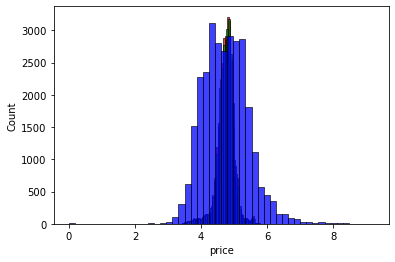

In [13]:
sns.histplot(y_pred_1, color='red', bins=50)
sns.histplot(y_pred_2, color='green', bins=50)
sns.histplot(y_train, color='blue', bins=50)

In [15]:
print("Option 1: ")
print(round(rmse(y_train, y_pred_1), 2))
print("Option 2: ")
print(round(rmse(y_train, y_pred_2), 2))

Option 1: 
0.64
Option 2: 
0.64
